In [18]:
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt
import seaborn as sns
import re

listColumnas = []


In [19]:
df = pd.read_csv("Estadísticas de Casos Sometidos.csv")
# df = pd.read_excel("Estadísticas de Casos Sometidos (1).xlsx")

In [20]:
def limpiar_datos (expresionRegular, palabra_clave):
    global df
    global listColumnas
    condicion = df["Delito"].str.contains(expresionRegular)
    df.loc[condicion, "Delito"] = palabra_clave
    # df.where(condicion, palabra_clave)
    listColumnas.append(palabra_clave)
    print(df["Delito"].value_counts().count())

In [21]:

limpiar_datos(r'[Rr]obo', 'Robo')

limpiar_datos(r'[Vv]iolencia', 'Violencia')

limpiar_datos(r'[Agresión|Abuso] [Ss]exual', 'Agresión sexual')

limpiar_datos(r'[Aa]ctividad [Ss]exual [Nn]o [Cc]onsentida', 'Actividad sexual no consentida')

limpiar_datos(r'[Tt]entativa', "Tentativa de crimen o delito")

limpiar_datos(r'[Dd]roga', 'Posesión, uso o tráfico de drogas')
limpiar_datos(r'[Mm]arihuana', 'Posesión, uso o tráfico de drogas')

limpiar_datos(r'[Ee]stafa', 'Estafa')

limpiar_datos(r'[Hh]omicidio', 'Homicidio')

limpiar_datos(r'[Pp]ornograf[íi¢]a Infantil', 'Pornografía Infantil')

limpiar_datos(r'[Ss]ecuestro', 'Secuestro')

limpiar_datos(r'[Aa]menaza', 'Amenaza')

limpiar_datos(r'[Ii]ncesto', 'Incesto')

limpiar_datos(r'C[óo¢]mplice', 'Cómplice de un crimen')

limpiar_datos(r'[Aa]rma', 'Uso de armas blancas y de fuego')

limpiar_datos(r'[Jj]uego', 'Juegos de azar')

limpiar_datos(r'[Aa]buso', 'Abusos')

limpiar_datos(r'[Aa]sesinato', 'Asesinato')

limpiar_datos(r'[Ss]uicidio', 'Suicidios')

limpiar_datos(r'[Ss]alud', 'Infracción a las leyes de salud')

limpiar_datos(r'[Aa]sociaci', "Asociación en un crimen")

limpiar_datos(r'[Tt]rafico', "Tráfico ilícito")

limpiar_datos(r'Detenci[oó¢]', "Detención o encierro ilegal")

limpiar_datos(r'[Aa]ccidentes', "Accidentes")

limpiar_datos(r'[Vv]iola', "Violación a las leyes y reglamentos")

limpiar_datos(r'[Cc]osas? [Aa]jena', 'Daño a propiedad ajena')

limpiar_datos(r'[Aa]gresi', 'Agresión')

limpiar_datos(r'F(alse|alsi)', 'Falsificación')

limpiar_datos(r'[Aa]cceso [Ii]l[í]cito', 'Acceso ilícito de datos o servicios')

limpiar_datos(r'[Ii]nfracc', "Infracciones")

5050
4698
4502
4497
4404
4243
4236
4211
4177
4173
4161
4057
4042
4028
3790
3773
3628
3622
3621
3598
3515
3479
3474
3429
3327
3317
3266


C:\Users\Manuel\AppData\Local\Temp\ipykernel_11696\1431157097.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condicion = df["Delito"].str.contains(expresionRegular)


3173
3132
3100


In [22]:
def condicion(x):
    return x in listColumnas


In [23]:
def comprobarRegistros(expresionRegular):
    test = df[df["Delito"].str.contains(expresionRegular)]
    # test = df[df["Delito"].str.extracts(expresionRegular)]
    
    
    for delitos in test["Delito"].unique():
        print(delitos)


In [24]:
comprobarRegistros(r'[Ii]nfracc')

Infracciones


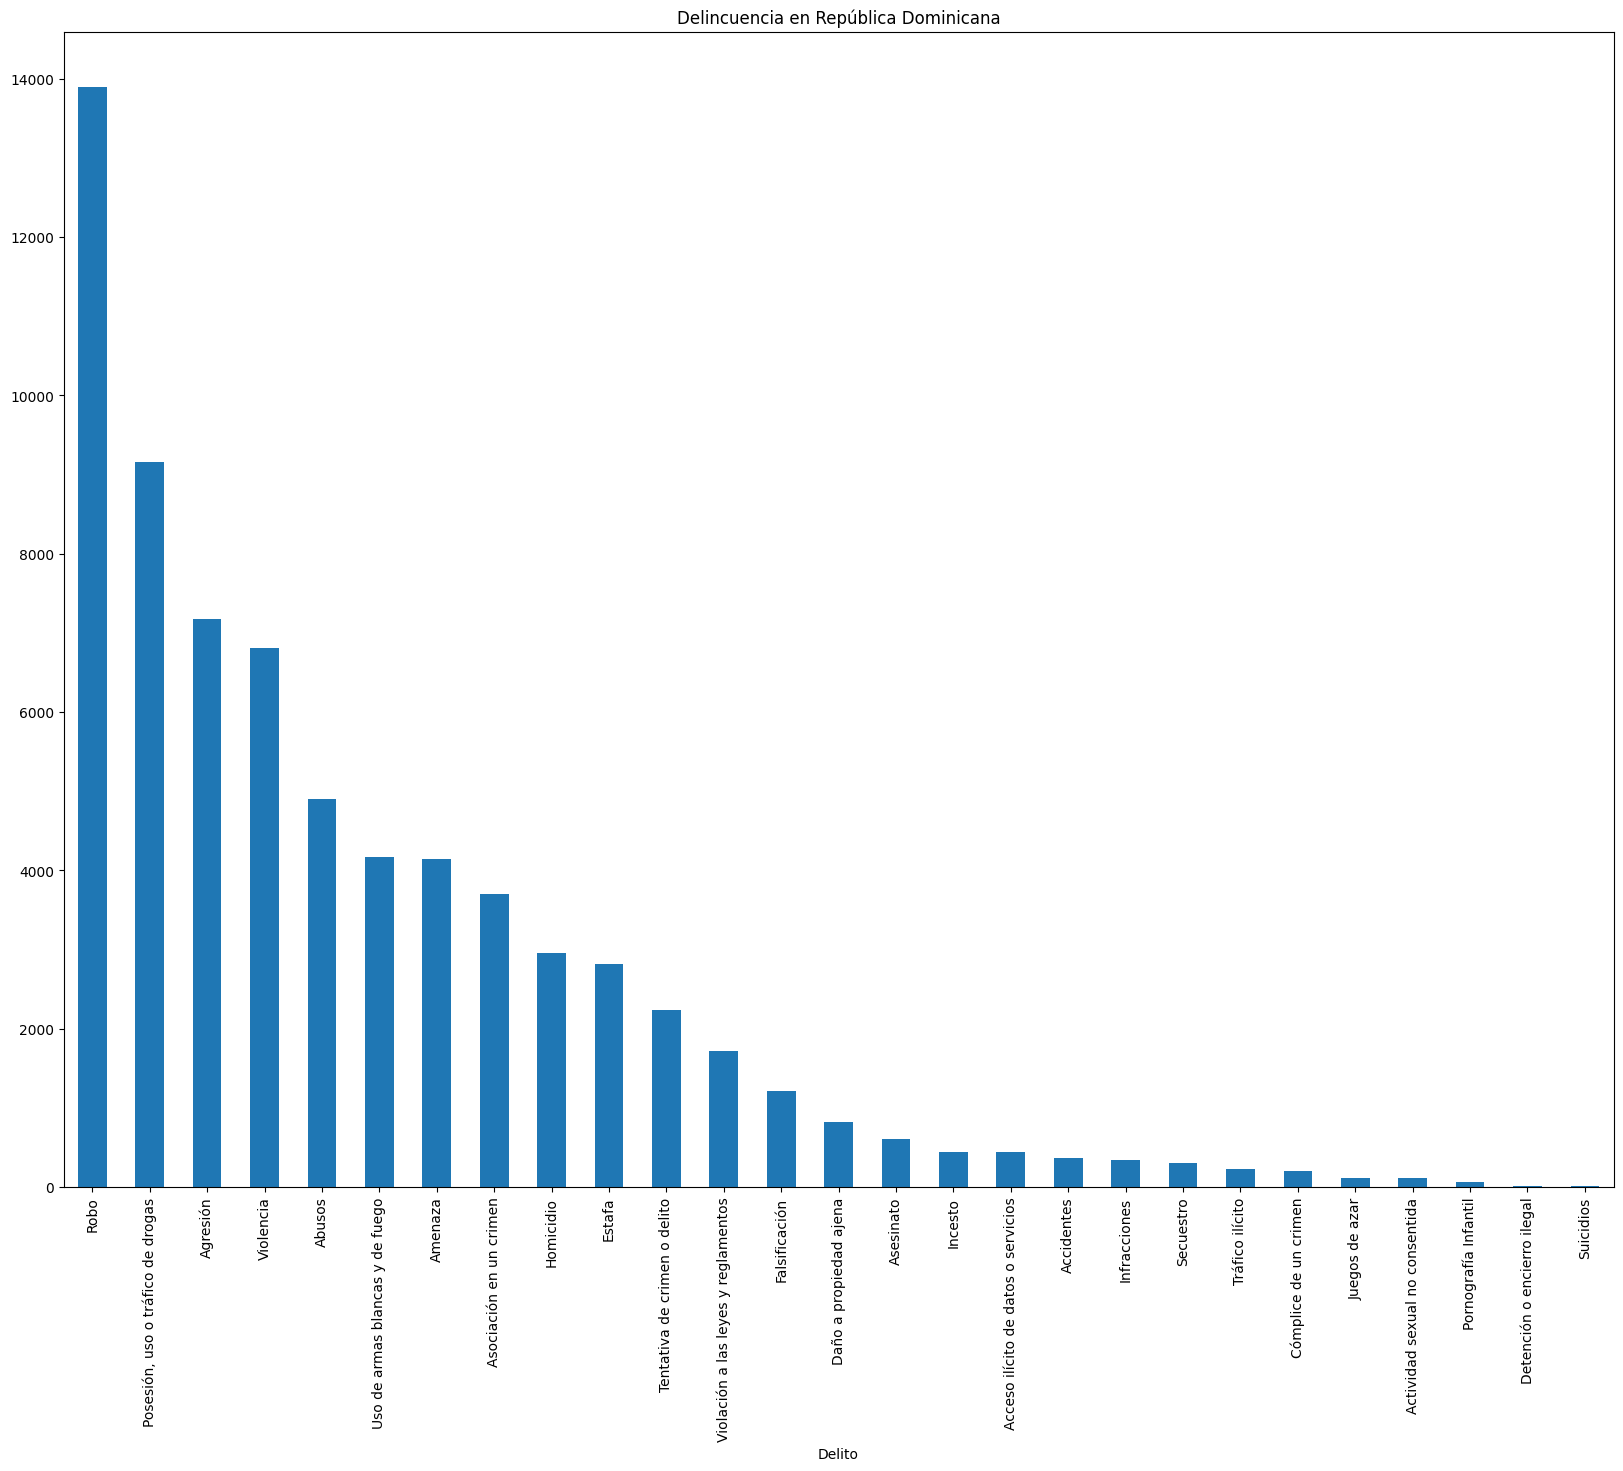

In [25]:
# df.where(df["Delito"] in listColumnas)
df_new = df[df["Delito"].isin(listColumnas)]
# df_new.reset_index()

plt.figure(figsize = (20, 15))
df_new["Delito"].value_counts().plot(kind='bar')

plt.title("Delincuencia en República Dominicana")
plt.show()